Decision Tree Accuracy: 0.7928363988383349
Random Forest Accuracy: 0.8378509196515005
XGBoost Accuracy: 0.829622458857696

Classification Report (XGBoost):

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1037
           1       0.83      0.83      0.83      1029

    accuracy                           0.83      2066
   macro avg       0.83      0.83      0.83      2066
weighted avg       0.83      0.83      0.83      2066



c:\Users\Hemanth\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [12:27:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


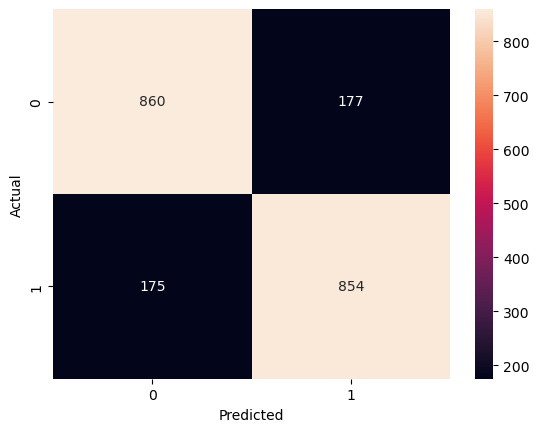

Prediction: Churn
Prediction Probability: [[0.25608754 0.74391246]]


{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder(),
 'Churn': LabelEncoder()}

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

# Load dataset
df = pd.read_csv(r"C:\Users\Hemanth\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Drop customerID
df.drop("customerID", axis=1, inplace=True)

# Convert TotalCharges to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df.dropna(inplace=True)

# Encode categorical columns
encoders = {}
for col in df.select_dtypes(include="object").columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

# Split features and target
X = df.drop("Churn", axis=1)
y = df["Churn"]

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

# Models
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss")

# Train and evaluate Decision Tree
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))

# Train and evaluate Random Forest
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

# Train and evaluate XGBoost
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))

# Classification report for best model (XGBoost)
print("\nClassification Report (XGBoost):\n")
print(classification_report(y_test, xgb_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, xgb_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

with open("churn_model.pkl", "wb") as f:
    pickle.dump(xgb, f)

loaded_model = pickle.load(open("churn_model.pkl", "rb"))

input_data = X.iloc[0].values.reshape(1, -1)
input_data_df = pd.DataFrame(input_data, columns=X.columns)


prediction = loaded_model.predict(input_data_df)
pred_prob = loaded_model.predict_proba(input_data_df)

print("Prediction:", "Churn" if prediction[0] == 1 else "No Churn")
print("Prediction Probability:", pred_prob)

encoders
